<a href="https://colab.research.google.com/github/ishaansingh22/stocktracker/blob/master/StockPredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Description: Using Artificial Recurrent Neural Network (LSTM) to predict closing stock price of Apple Inc. 
# Done using the past 60 day stock price. 

In [4]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
Using TensorFlow backend.


In [5]:
df = web.DataReader('AAPL', data_source= 'yahoo', start = '2012-04-01', end= '2020-05-30')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-04-02,88.395714,85.768570,85.975716,88.375717,149587900.0,76.506630
2012-04-03,90.315712,88.930000,89.614288,89.902855,208639900.0,77.828667
2012-04-04,89.408569,88.142860,89.192856,89.187141,143245200.0,77.209068
2012-04-05,90.665718,89.057144,89.568573,90.525711,160324500.0,78.367867
2012-04-09,91.405716,89.328575,89.447144,90.889999,149384200.0,78.683235
...,...,...,...,...,...,...
2020-05-22,319.230011,315.350006,315.769989,318.890015,20450800.0,318.890015
2020-05-26,324.239990,316.500000,323.500000,316.730011,31380500.0,316.730011
2020-05-27,318.709991,313.089996,316.140015,318.109985,28236300.0,318.109985


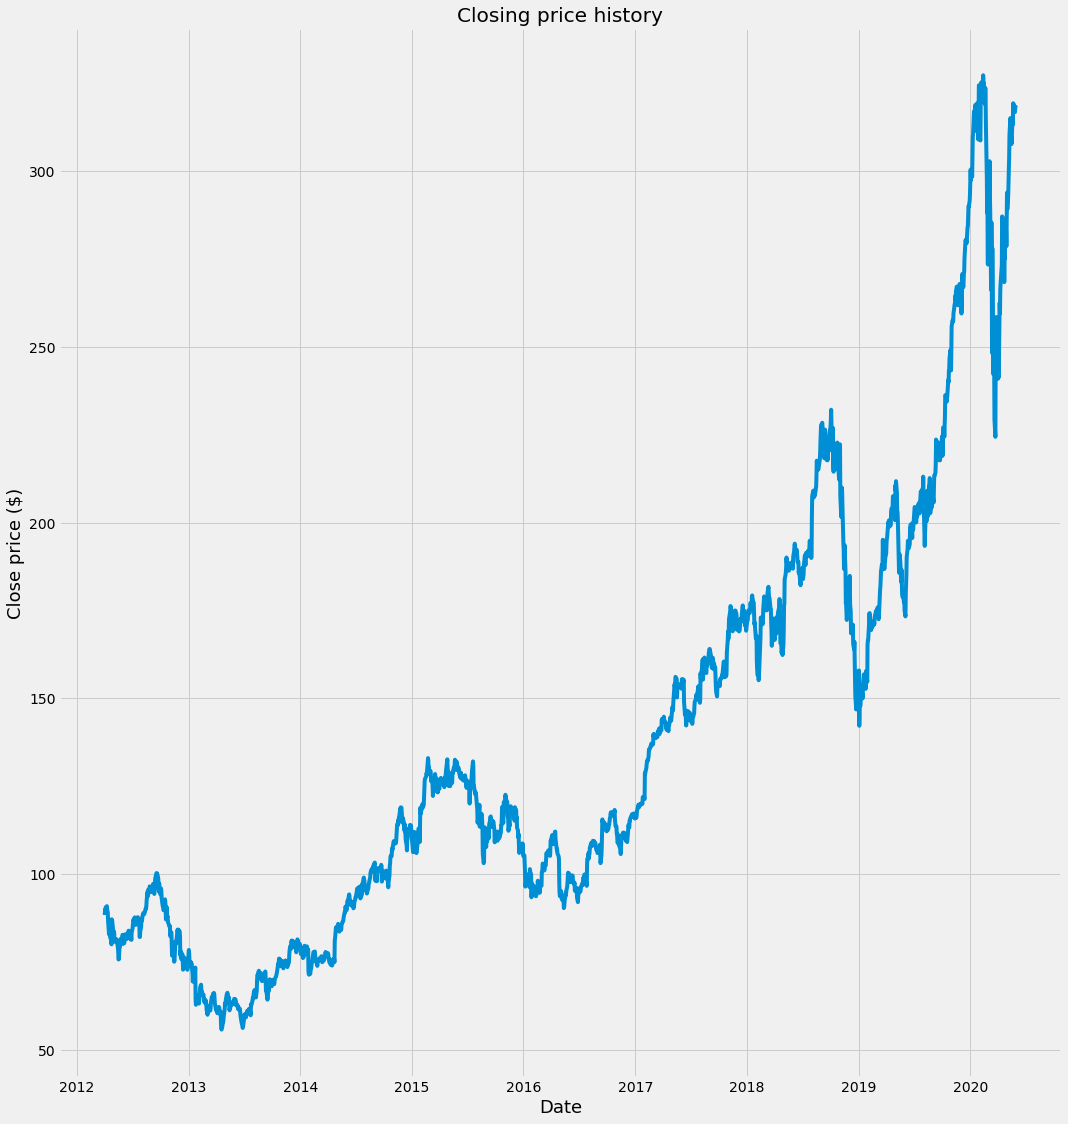

In [6]:
plt.figure(figsize= (16,18))
plt.title('Closing price history')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize =18)
plt.ylabel('Close price ($)', fontsize= 18)
plt.show()

In [7]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset) * .8)
training_data_len

1643

In [8]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.12006085],
       [0.12568753],
       [0.12305051],
       ...,
       [0.96650814],
       [0.96702402],
       [0.96588184]])

In [9]:
train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60: i, 0])
  y_train.append(train_data[i,0])
  if i <= 61:
    print(x_train)
    print(y_train)
    print()


[array([0.12006085, 0.12568753, 0.12305051, 0.12798242, 0.12932463,
       0.12522436, 0.12404533, 0.12223992, 0.11300771, 0.0997963 ,
       0.11536051, 0.11464468, 0.10364392, 0.09603288, 0.09535914,
       0.08934821, 0.11551843, 0.11430781, 0.11183397, 0.10182274,
       0.100849  , 0.10287544, 0.10068582, 0.09196418, 0.09419065,
       0.09350639, 0.09403275, 0.09473804, 0.09273266, 0.08826392,
       0.08560585, 0.08187402, 0.07347345, 0.07361029, 0.08987455,
       0.087606  , 0.09475909, 0.09200103, 0.09040617, 0.09565916,
       0.099291  , 0.09853306, 0.08972191, 0.09145887, 0.09069042,
       0.09523284, 0.09536968, 0.09989629, 0.09508017, 0.09770668,
       0.09560128, 0.09526966, 0.09663818, 0.10277017, 0.10362815,
       0.10274911, 0.09850146, 0.10083321, 0.09486965, 0.09553286])]
[0.09683292576797048]

[array([0.12006085, 0.12568753, 0.12305051, 0.12798242, 0.12932463,
       0.12522436, 0.12404533, 0.12223992, 0.11300771, 0.0997963 ,
       0.11536051, 0.11464468, 0.10

In [0]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [11]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1583, 60, 1)

In [0]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [0]:
model.compile(optimizer='adam',loss='mean_squared_error')


In [23]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

Epoch 1/1
1583/1583 [==============================] - 54s 34ms/step - loss: 3.4770e-04


In [0]:
test_data = scaled_data[training_data_len - 60: , :]
x_test=[]
y_test= dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i,0])
  


In [0]:
x_test = np.array(x_test)

In [0]:
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [0]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


In [28]:
rmse = np.sqrt( np.mean(predictions - y_test)**2) 
rmse

1.7353287859660824

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


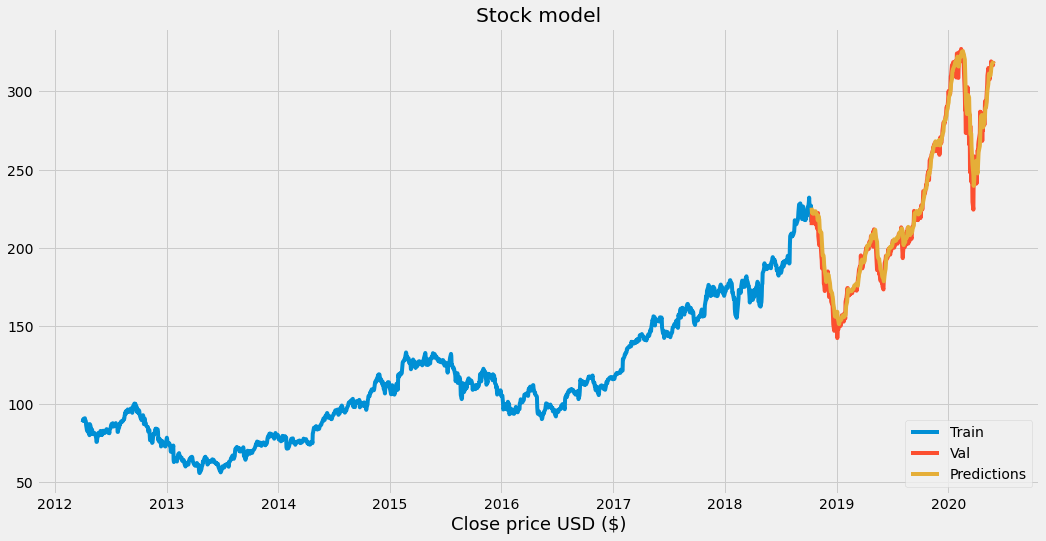

In [29]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize= (16, 8))
plt.title('Stock model')
plt.xlabel('Date', fontsize=18)
plt.xlabel('Close price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [30]:
valid

,Close,Predictions
Date,,
2018-10-11,214.449997,225.612473
2018-10-12,222.110001,222.439453
2018-10-15,217.360001,222.357727
2018-10-16,222.149994,221.722733
2018-10-17,221.190002,222.590134
...,...,...
2020-05-22,318.890015,317.310883
2020-05-26,316.730011,318.605469
2020-05-27,318.109985,318.754028


In [34]:
apple_quote = web.DataReader('AAPL',data_source='yahoo',start = '2012-04-01', end= '2020-05-30')
new_df = apple_quote.filter(['Close'])
last_60_days = new_df[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[319.4476]]


In [35]:
apple_quote2 = web.DataReader('AAPL',data_source='yahoo',start = '2012-04-01', end= '2020-05-31')
print(apple_quote2['Close'])

Date
2012-04-02     88.375717
2012-04-03     89.902855
2012-04-04     89.187141
2012-04-05     90.525711
2012-04-09     90.889999
                 ...    
2020-05-22    318.890015
2020-05-26    316.730011
2020-05-27    318.109985
2020-05-28    318.250000
2020-05-29    317.940002
Name: Close, Length: 2053, dtype: float64
